### Evaluate Accuracy

In [4]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from medmnist import INFO
from medmnist.dataset import BreastMNIST

# Load the dataset
data_flag = 'breastmnist'
info = INFO[data_flag]

test_dataset = BreastMNIST(split='test', download=True)

# Get test images and labels
X_test, y_test = test_dataset.imgs, test_dataset.labels

# Normalize
X_test = X_test / 255.0

# Reshape
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_test_cat = to_categorical(y_test)


In [5]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print("Test Accuracy:", test_acc)


5/5 [==============================] - 0s 5ms/step - loss: 0.4668 - accuracy: 0.7692
Test Accuracy: 0.7692307829856873


### Make Predictions

In [7]:
import numpy as np

# Get predictions from the model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)


5/5 [==============================] - 0s 4ms/step


### Confusion Matrix

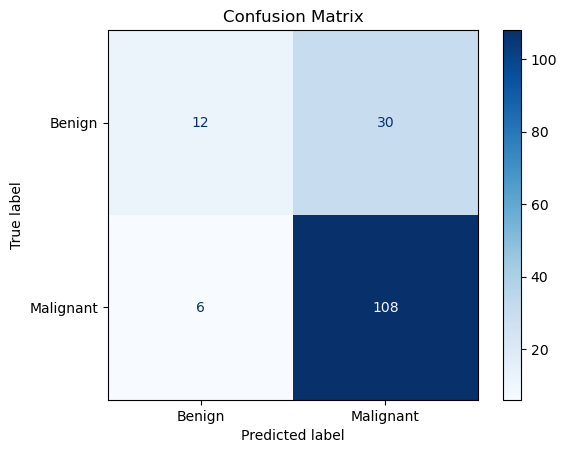

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


### Classification Report

In [9]:
from sklearn.metrics import classification_report

print("📋 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=["Benign", "Malignant"]))


📋 Classification Report:

              precision    recall  f1-score   support

      Benign       0.67      0.29      0.40        42
   Malignant       0.78      0.95      0.86       114

    accuracy                           0.77       156
   macro avg       0.72      0.62      0.63       156
weighted avg       0.75      0.77      0.73       156



### ROC Curve

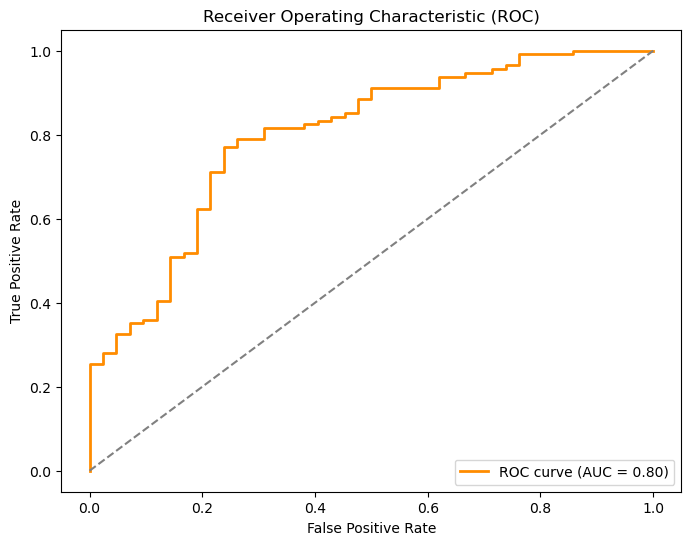

In [10]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Since it's binary, get scores for class 1
fpr, tpr, _ = roc_curve(y_true, y_pred_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
